In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [8]:
#load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
len(x_train)

60000

In [11]:
len(x_test)

10000

In [13]:
x_train[0].shape

(28, 28)

In [14]:
#preprocess input images
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)/255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)/ 255.0

In [15]:
#convert labels to cetagorical one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [16]:
#create cnn model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [22]:
#compile model with adam
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
#train model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data = (x_test, y_test))

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
469/469 [==============================] - 40s 84ms/step - loss: 0.0127 - accuracy: 0.9955 - val_loss: 0.0317 - val_accuracy: 0.9898
Epoch 2/10
469/469 [==============================] - 37s 79ms/step - loss: 0.0088 - accuracy: 0.9973 - val_loss: 0.0302 - val_accuracy: 0.9918
Epoch 3/10
469/469 [==============================] - 36s 76ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.0330 - val_accuracy: 0.9914
Epoch 4/10
469/469 [==============================] - 34s 73ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.0320 - val_accuracy: 0.9912
Epoch 5/10
469/469 [==============================] - 34s 73ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0405 - val_accuracy: 0.9892
Epoch 6/10
469/469 [==============================] - 34s 72ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0340 - val_accuracy: 0.9924
Epoch 7/10
469/469 [==============================] - 34s 73ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 0.0338 - val_accuracy:

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test Accuracy: ', score[1])

Test loss:  0.025677038356661797
Test Accuracy:  0.9923999905586243


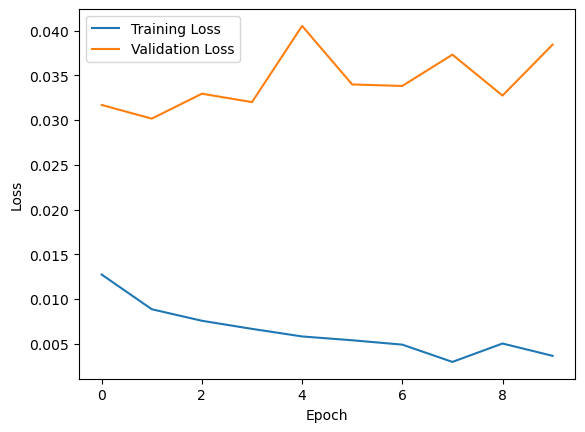

In [23]:
#training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 3s 8ms/step


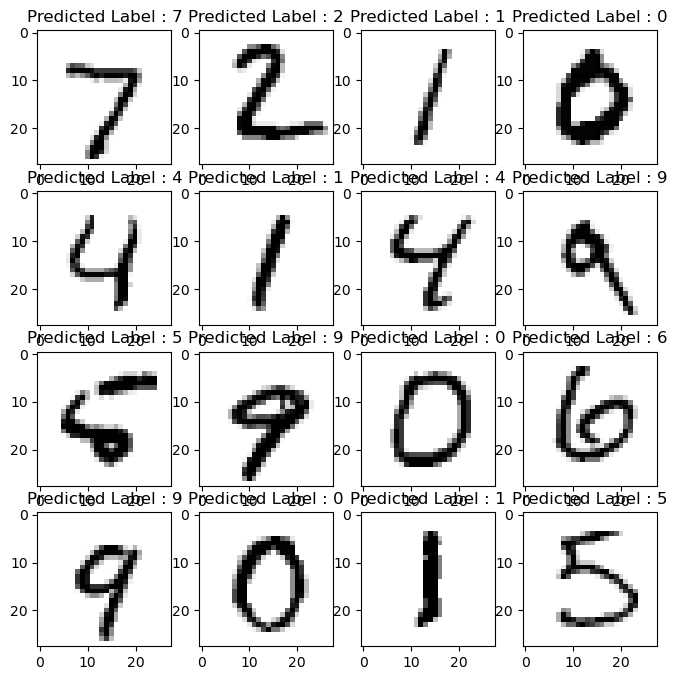

In [25]:
#show a sample of predicted images labels 
predictions = model.predict(x_test)
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(28, 28), cmap='binary')
    ax.set(title = f"Predicted Label : {predictions[i].argmax()}")

plt.show()